In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import time, timedelta, datetime
# for easy import/export
# import json
# for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from pprint import pprint

In [2]:
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

In [4]:
%matplotlib inline
get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')
mpl.rcParams['figure.figsize'] = (14.0, 6.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
# mpl.rcParams['xtick.major.size'] = 10
# mpl.rcParams['ytick.major.size'] = 10
# mpl.rcParams['xtick.minor.size'] = 5
# mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.9
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['legend.scatterpoints'] = 1

In [5]:
# let's open the parsed results from the webpage
with open("results.html") as f:
    soup = BeautifulSoup(f.read(), "html.parser")

In [6]:
len(soup)

6348

In [7]:
# Let's define a runner class
class Runner(object):
    def __init__(self, position=-999, number=-999, gender=None, name=None, age=None, 
                 nationality=None, time=None, cadence=None, moy=None, 
                 cat_place=None, cat_name=None, city=None):
        self.position = position
        self.number = number
        self.gender = gender
        self.name = name
        self.age = age
        self.nationality = nationality
        self.time = time
        self.cadence = cadence
        self.moy = moy
        self.cat_place = cat_place
        self.cat_name = cat_name,
        self.city = city

In [8]:
all_tds = soup.findAll('td')
columns = ['Pos', 'Nr', 'Gender','Name', 'Age', 'NAT', 'Time', 'Tkm', 'Moy.', 'Place', 'Name', 'City']

In [9]:
len(all_tds)

82475

In [10]:
td_hits = []
for td in all_tds:
    if len(td.contents) > 0:
        if not isinstance(td.contents[0], unicode): continue
        if td.contents[0].encode('utf-8').strip() in columns: continue
        if 'Category' in td.contents[0].encode('utf-8').strip(): continue
        if td.contents[0] == ' ': continue
    td_hits.append(td.contents)

In [11]:
len(td_hits)

76128

In [12]:
len(td_hits)/ 12.0

6344.0

In [13]:
nColumns = 12

In [14]:
chunks = [td_hits[i:i + nColumns] for i in range(0, len(td_hits), nColumns)]

In [15]:
len(chunks) # this should correspond to the number of runners

6344

In [16]:
chunks[0][0]
runners = []

In [17]:
for chunk in chunks:
    if isinstance(chunk[0][0],unicode):
        position = str(chunk[0][0])
    else:
        position =  int(float(chunk[0][0]))
    bib = int(float(chunk[1][0]))
    if len(chunk[2]) == 0:
        gender = 'M'
    else:
        gender = 'F'
    name = chunk[3][0]
    if len(chunk[4]) == 0:
        age = None
    else:
        age = chunk[4][0]
    if len(chunk[5]) == 0:
        nationality = None
    else:
        nationality = chunk[5][0]
    if len(chunk[6]) == 0:
        time = None
    else:
        time = chunk[6][0]
    if len(chunk[7]) == 0:
        cadence = None
    else:
        cadence = chunk[7][0]
    if len(chunk[8]) == 0:
        moy = None
    else:
        moy = chunk[8][0]
    if len(chunk[9]) ==0:
        cat_place = None
    else:
        cat_place = int(float(chunk[9][0]))
    if len(chunk[10]) ==0:
        cat_name = None
    else:
        cat_name = chunk[10][0]
    if len(chunk[11]) == 0:
        city = None
    else:
        city = chunk[11][0]
        
    runner = Runner(position=position, number=bib, gender=gender,
                   name=name, age=age, nationality=nationality, time=time,
                   cadence=cadence, moy=moy, cat_place=cat_place,
                   cat_name=cat_name,city=city)
    runners.append(runner)

In [18]:
runners[2].__dict__

{'age': u'22',
 'cadence': u'3:23',
 'cat_name': (u'SEH',),
 'cat_place': 3,
 'city': u'GENVAL',
 'gender': 'M',
 'moy': u' 17.76',
 'name': u'BALTY Pierre',
 'nationality': u'BEL',
 'number': 12317,
 'position': '3.',
 'time': u'1:11:17'}

In [19]:
runner_instance = runners[2]

In [20]:
nRunners = len(runners)

In [21]:
import unicodedata
def convertToString(line):
    print line.astype(str)
    if isinstance(line, unicode):
        return unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    else: return line

In [22]:
# let's dump this to a pandas dataframe

In [23]:
df = pd.DataFrame(data = [x.__dict__ for x in runners],
                  columns = runners[0].__dict__.keys())

In [24]:
df.head()

,city,moy,name,cat_name,cat_place,gender,age,time,number,nationality,position,cadence
0,BELPER,18.58,BULL Josh,"(SEH,)",1.0,M,25,1:08:07,3164,GBR,1.,3:14
1,ETTERBEEK,18.35,CLAIS François,"(SEH,)",2.0,M,32,1:09:00,10080,BEL,2.,3:17
2,GENVAL,17.76,BALTY Pierre,"(SEH,)",3.0,M,22,1:11:17,12317,BEL,3.,3:23
3,SOUMAGNE,17.42,CAELEN Florent,"(SEH,)",4.0,M,28,1:12:40,3001,BEL,4.,3:27
4,BRUXELLES,17.21,OUMAROU Yahaya,"(SEH,)",5.0,M,30,1:13:33,9275,NER,5.,3:30


In [25]:
df.tail()

,city,moy,name,cat_name,cat_place,gender,age,time,number,nationality,position,cadence
6339,BRUXELLES,None,THIERENS François,"(SEH,)",NaN,M,32,None,7579,BEL,DNF,None
6340,WATERLOO,None,VAHL Marius,"(M45,)",NaN,M,46,None,4385,NOR,DNF,None
6341,ROSIÈRES,None,VAN OOST Grégoire,"(SEH,)",NaN,M,27,None,4615,BEL,DNF,None
6342,OLMEN,None,VERBEEK Barbara,"(SEF,)",NaN,F,32,None,9008,BEL,DNF,None
6343,SCHAARBEEK,None,VERBRUGGEN Jonas,"(SEH,)",NaN,M,27,None,4719,BEL,DNF,None


In [26]:
df['nationality'] = df['nationality'].astype('str') 

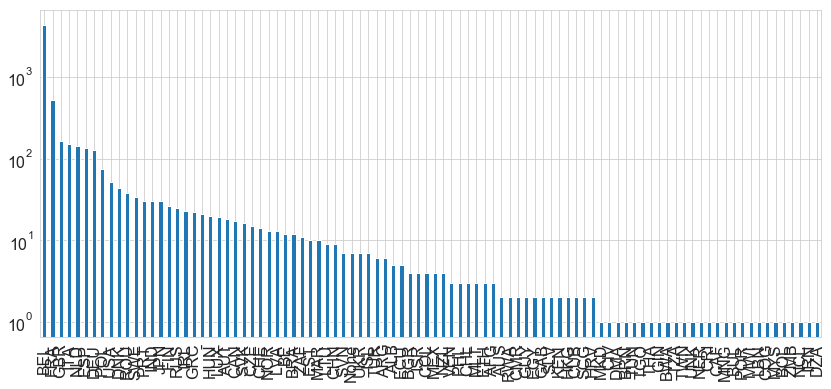

In [27]:
df['nationality'].value_counts().plot(kind="bar", logy=True)

In [28]:
# Let's find the unique nationalities

In [29]:
nationalities = df['nationality'].value_counts().keys()

In [30]:
age = df['age']

In [31]:
# let's drop unnecessary columns
df = df.drop(['moy'],axis=1)

In [32]:
df.head()
# now let's convert the cat_name to string

,city,name,cat_name,cat_place,gender,age,time,number,nationality,position,cadence
0,BELPER,BULL Josh,"(SEH,)",1.0,M,25,1:08:07,3164,GBR,1.,3:14
1,ETTERBEEK,CLAIS François,"(SEH,)",2.0,M,32,1:09:00,10080,BEL,2.,3:17
2,GENVAL,BALTY Pierre,"(SEH,)",3.0,M,22,1:11:17,12317,BEL,3.,3:23
3,SOUMAGNE,CAELEN Florent,"(SEH,)",4.0,M,28,1:12:40,3001,BEL,4.,3:27
4,BRUXELLES,OUMAROU Yahaya,"(SEH,)",5.0,M,30,1:13:33,9275,NER,5.,3:30


In [33]:
df['cat_name'] = df['cat_name'].apply(lambda x: str(x[0]))

In [34]:
df['cat_name'].head()

0    SEH
1    SEH
2    SEH
3    SEH
4    SEH
Name: cat_name, dtype: object

In [35]:
nationality_mapping = {nationality:id for (id, nationality) in enumerate(nationalities)}

In [36]:
df.head()

,city,name,cat_name,cat_place,gender,age,time,number,nationality,position,cadence
0,BELPER,BULL Josh,SEH,1.0,M,25,1:08:07,3164,GBR,1.,3:14
1,ETTERBEEK,CLAIS François,SEH,2.0,M,32,1:09:00,10080,BEL,2.,3:17
2,GENVAL,BALTY Pierre,SEH,3.0,M,22,1:11:17,12317,BEL,3.,3:23
3,SOUMAGNE,CAELEN Florent,SEH,4.0,M,28,1:12:40,3001,BEL,4.,3:27
4,BRUXELLES,OUMAROU Yahaya,SEH,5.0,M,30,1:13:33,9275,NER,5.,3:30


In [37]:
def convert_country_to_id(row):
    return nationality_mapping[row]

In [38]:
convert_country_to_id('FRA')

1

In [39]:
df.sample(4)

,city,name,cat_name,cat_place,gender,age,time,number,nationality,position,cadence
695,GOSSELIES,DUPONT Romain,SEH,346.0,M,31,1:37:20,3227,BEL,696.,4:37
1297,MONTIGNY LE TILLEUL,DEWILLE Michel,M35,195.0,M,37,1:43:27,5983,BEL,1298.,4:55
3295,GENT,DE BLOCK Jolien,SEF,267.0,F,31,1:57:57,4574,BEL,3296.,5:36
2605,LAEKEN,RAMIREZ FERNANDEZ Maria Del Mar,F35,48.0,F,39,1:53:19,6127,ESP,2606.,5:23


In [40]:
# want to convert the map the categorical values to numerical

In [41]:
# the easiest is to convert gender M=0, F=1
df['gender']=='M'
df.loc[df['gender']=='M','gender'] = 0
df.loc[df['gender']=='F','gender'] = 1

In [42]:
df.head()

,city,name,cat_name,cat_place,gender,age,time,number,nationality,position,cadence
0,BELPER,BULL Josh,SEH,1.0,0,25,1:08:07,3164,GBR,1.,3:14
1,ETTERBEEK,CLAIS François,SEH,2.0,0,32,1:09:00,10080,BEL,2.,3:17
2,GENVAL,BALTY Pierre,SEH,3.0,0,22,1:11:17,12317,BEL,3.,3:23
3,SOUMAGNE,CAELEN Florent,SEH,4.0,0,28,1:12:40,3001,BEL,4.,3:27
4,BRUXELLES,OUMAROU Yahaya,SEH,5.0,0,30,1:13:33,9275,NER,5.,3:30


In [43]:
df.isnull().sum()

city           76
name            0
cat_name        0
cat_place      89
gender          0
age            38
time           48
number          0
nationality     0
position        0
cadence        49
dtype: int64

In [44]:
# we've still loads of missing values
df.city.value_counts()

BRUXELLES                675
BRUSSELS                 229
IXELLES                  129
BRUSSEL                  100
ETTERBEEK                 91
UCCLE                     85
ANTWERPEN                 85
GENT                      70
SCHAERBEEK                60
LEUVEN                    55
OVERIJSE                  54
AUDERGHEM                 51
PARIS                     47
WATERLOO                  45
KRAAINEM                  39
MECHELEN                  39
TERVUREN                  36
JETTE                     33
GRIMBERGEN                31
ANDERLECHT                31
BRUGGE                    30
EVERE                     30
WEZEMBEEK-OPPEM           28
DILBEEK                   28
HASSELT                   27
HEVERLEE                  27
OTTIGNIES                 26
VILVOORDE                 26
LOUVAIN-LA-NEUVE          26
WEMMEL                    26
                        ... 
ESSEX                      1
DOUVRES LA DÉLIVRANDE      1
NOORDERWIJK                1
ALMERE        

In [45]:
df['city']= df['city'].replace({"BRUXELLES":"BRUSSELS","BRUSSEL":"BRUSSELS"})

In [46]:
def convert_positions(row):
    if row == 'DNF' or row =='DSQ':
        return np.NaN
    else:
        return int(float(row))
def convert_age(row):
    if row == None:
        return np.NaN
    return abs(int(row))

In [47]:
df['position'] = df['position'].apply(convert_positions)
# we could in theory set the missing ages to the mean but that might bias the results
df['age'] = df['age'].apply(convert_age)

In [48]:
df.head()

,city,name,cat_name,cat_place,gender,age,time,number,nationality,position,cadence
0,BELPER,BULL Josh,SEH,1.0,0,25.0,1:08:07,3164,GBR,1.0,3:14
1,ETTERBEEK,CLAIS François,SEH,2.0,0,32.0,1:09:00,10080,BEL,2.0,3:17
2,GENVAL,BALTY Pierre,SEH,3.0,0,22.0,1:11:17,12317,BEL,3.0,3:23
3,SOUMAGNE,CAELEN Florent,SEH,4.0,0,28.0,1:12:40,3001,BEL,4.0,3:27
4,BRUSSELS,OUMAROU Yahaya,SEH,5.0,0,30.0,1:13:33,9275,NER,5.0,3:30


In [49]:
# let's split men and women dataframes
df_male= df[df['gender'] == 0]
df_female = df[df['gender'] == 1]

In [50]:
df_male.tail()
df_female.tail()

,city,name,cat_name,cat_place,gender,age,time,number,nationality,position,cadence
6329,BRUSSELS,PEREGO Anna,SEF,NaN,1,28.0,None,10779,ITA,NaN,None
6330,JETTE (BELGIQUE),REUTER Virginie,SEF,NaN,1,26.0,None,7730,BEL,NaN,None
6335,TIENEN,STEENWEGEN Lore,SEF,NaN,1,25.0,None,7249,BEL,NaN,None
6337,BRUSSELS,SVEIDQVIST Mimi,F40,NaN,1,43.0,None,5088,SWE,NaN,None
6342,OLMEN,VERBEEK Barbara,SEF,NaN,1,32.0,None,9008,BEL,NaN,None


/Library/Python/2.7/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Library/Python/2.7/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


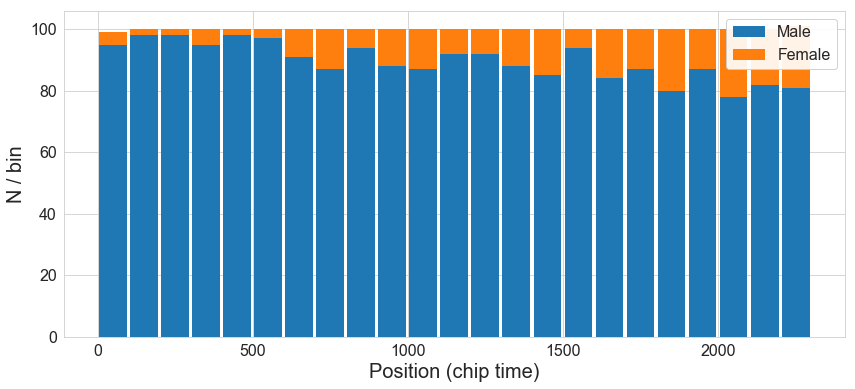

In [51]:
pos = 'position'
nbins = 23
lw = 0
x_range = [0, 2300]
normed = False
n, bins, _ = plt.hist([df_male[pos].values, df_female[pos].values], 
                      bins=nbins, stacked=True, histtype='barstacked',
                      label=['Male', 'Female'], lw=lw, range=x_range, 
                      rwidth=0.9, normed=normed)
plt.xlabel('Position (chip time)')
plt.ylabel("N / bin")
plt.legend(loc=0)

In [52]:
# correlation between gender and position time indicates men finishing quicker than women
# perhaps a bit unbiased given 2x more men participating then women

In [53]:
#time_converter = np.vectorize(lambda x : pd.to_datetime(x, format='%M:%S'))

In [54]:
#df['cadence'] = df['cadence'].apply(time_converter)
#df['time'] = df['time'].apply(time_converter)

In [55]:
df.head()

,city,name,cat_name,cat_place,gender,age,time,number,nationality,position,cadence
0,BELPER,BULL Josh,SEH,1.0,0,25.0,1:08:07,3164,GBR,1.0,3:14
1,ETTERBEEK,CLAIS François,SEH,2.0,0,32.0,1:09:00,10080,BEL,2.0,3:17
2,GENVAL,BALTY Pierre,SEH,3.0,0,22.0,1:11:17,12317,BEL,3.0,3:23
3,SOUMAGNE,CAELEN Florent,SEH,4.0,0,28.0,1:12:40,3001,BEL,4.0,3:27
4,BRUSSELS,OUMAROU Yahaya,SEH,5.0,0,30.0,1:13:33,9275,NER,5.0,3:30


In [56]:
df.isnull().sum()

city           76
name            0
cat_name        0
cat_place      89
gender          0
age            38
time           48
number          0
nationality     0
position       49
cadence        49
dtype: int64

In [57]:
# let's drop the cat_place for now
df.drop(labels=['cat_place'], axis=1,inplace=True)

In [58]:
df.isnull().sum()

city           76
name            0
cat_name        0
gender          0
age            38
time           48
number          0
nationality     0
position       49
cadence        49
dtype: int64

In [59]:
# we can drop the empty age rows - remember in some cases it might be useful to set this as something else
df.dropna(subset=['age'],inplace=True)

In [60]:
# Let's make the None cities of Belgian nationality from Brussels
copy = df.copy()
copy.loc[(copy['city'].isnull()) & copy['nationality'].isin(['BEL']),'city'] = 'BRUSSELS'

In [61]:
copy.city.value_counts().head()

BRUSSELS     1049
IXELLES       129
ETTERBEEK      89
UCCLE          85
ANTWERPEN      85
Name: city, dtype: int64

In [62]:
df.loc[(df['city'].isnull()) & df['nationality'].isin(['BEL']),'city'] = 'BRUSSELS'

In [63]:
df = df.dropna(subset=['time'])

In [64]:
df = df.dropna(subset=['cadence'])

In [65]:
df.isnull().sum()

city           0
name           0
cat_name       0
gender         0
age            0
time           0
number         0
nationality    0
position       0
cadence        0
dtype: int64

In [66]:
age = df['age']
age.describe()

count    6257.000000
mean       37.585265
std        11.074720
min        15.000000
25%        29.000000
50%        37.000000
75%        46.000000
max        88.000000
Name: age, dtype: float64

In [67]:
# average age is 37 with the oldest and youngest at 88 and 15!
# now we've cleaned up or empty fields let's start cleaning the data

In [68]:
# let's create 2 DFs for gender
df_male= df[df['gender'] == 0]
df_female = df[df['gender'] == 1]

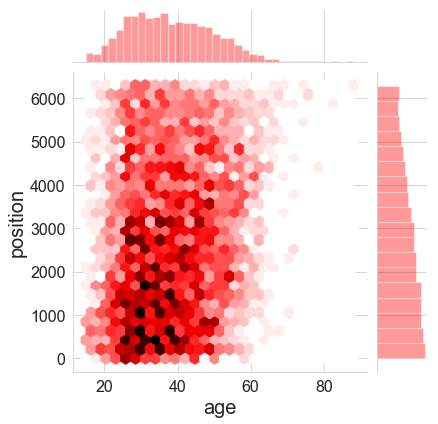

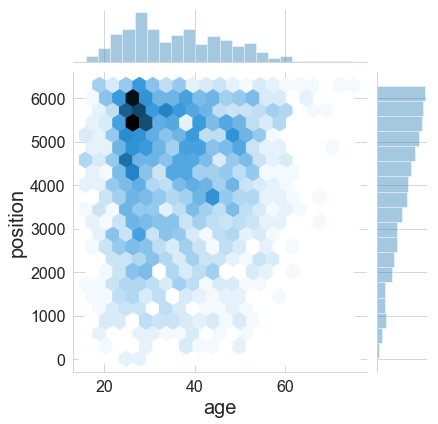

In [69]:
plot = sns.jointplot(x='age', y='position', 
              data=df_male.dropna(), kind="hex",color="r")
plot_f = sns.jointplot(x='age', y='position', 
              data=df_female.dropna(), kind="hex")

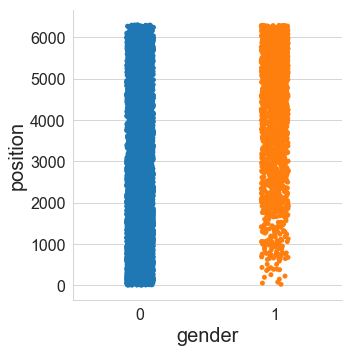

In [70]:
# interesting observation: for the same age, males tend to finish quicker than females
sns.catplot(x="gender",y="position",jitter=True, data=df)

In [71]:
time_converter = np.vectorize(lambda x : pd.to_datetime(x, format='%H:%M:%S'))

In [72]:
df_belgians = df[df.nationality.str.contains('BEL')]

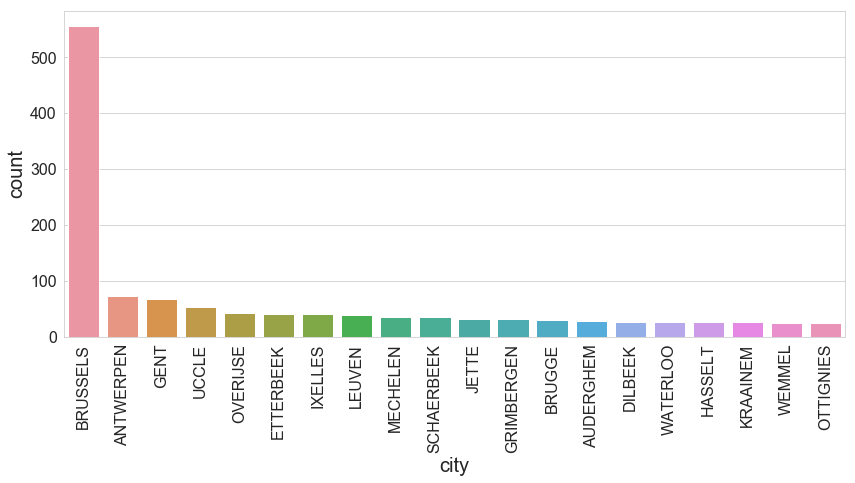

In [73]:
by_city = sns.countplot(x = 'city',
              data = df_belgians.dropna(),
              order = df_belgians['city'].value_counts().iloc[:20].index)
for item in by_city.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [74]:
# a clear point to note here is that there are alot of people with city = Brussels, but who aren't Belgian

In [75]:
df.head()

,city,name,cat_name,gender,age,time,number,nationality,position,cadence
0,BELPER,BULL Josh,SEH,0,25.0,1:08:07,3164,GBR,1.0,3:14
1,ETTERBEEK,CLAIS François,SEH,0,32.0,1:09:00,10080,BEL,2.0,3:17
2,GENVAL,BALTY Pierre,SEH,0,22.0,1:11:17,12317,BEL,3.0,3:23
3,SOUMAGNE,CAELEN Florent,SEH,0,28.0,1:12:40,3001,BEL,4.0,3:27
4,BRUSSELS,OUMAROU Yahaya,SEH,0,30.0,1:13:33,9275,NER,5.0,3:30


In [76]:
df['city'] = df['city'].apply(lambda x: x.encode('utf-8'))

In [77]:
df.head()

,city,name,cat_name,gender,age,time,number,nationality,position,cadence
0,BELPER,BULL Josh,SEH,0,25.0,1:08:07,3164,GBR,1.0,3:14
1,ETTERBEEK,CLAIS François,SEH,0,32.0,1:09:00,10080,BEL,2.0,3:17
2,GENVAL,BALTY Pierre,SEH,0,22.0,1:11:17,12317,BEL,3.0,3:23
3,SOUMAGNE,CAELEN Florent,SEH,0,28.0,1:12:40,3001,BEL,4.0,3:27
4,BRUSSELS,OUMAROU Yahaya,SEH,0,30.0,1:13:33,9275,NER,5.0,3:30


In [78]:
unique_cities = df.city.unique()
unique_cities = list(unique_cities)

In [79]:
# would be good to split the cities across wallonie flandre

In [80]:
# I'd like to split cities by district - Flanders or Wallonie 
import wikipedia
def getCitiesInRegion(page_name,nCols):
    wallonie = wikipedia.page(page_name)
    soup = BeautifulSoup(wallonie.html(), "html.parser")    
    all_tds = soup.findAll('td')
    all_cities = []
    for td in all_tds:
        all_cities.append(td.getText())
    city_split = [all_cities[i:i+nCols] for i in range(0,len(all_cities),nCols)]
    cities = [city_info[0] for city_info in city_split]
    return cities

In [81]:
cities = getCitiesInRegion("List_of_cities_in_Wallonia",6 )
wallonie_cities = [ unicodedata.normalize("NFKD", city).encode("ascii", "ignore") for city in cities ]
wallonie_cities[-1]

'Wavre'

In [82]:
flanders_cities = getCitiesInRegion("List_of_cities_in_Flanders", 4)

In [83]:
flanders_cities = [ unicodedata.normalize("NFKD", city).encode("ascii", "ignore") for city in flanders_cities ]

flanders_cities[-1]

'Zoutleeuw'

In [84]:
average_position = df[['age','position']].groupby(['age'],as_index=False).mean()

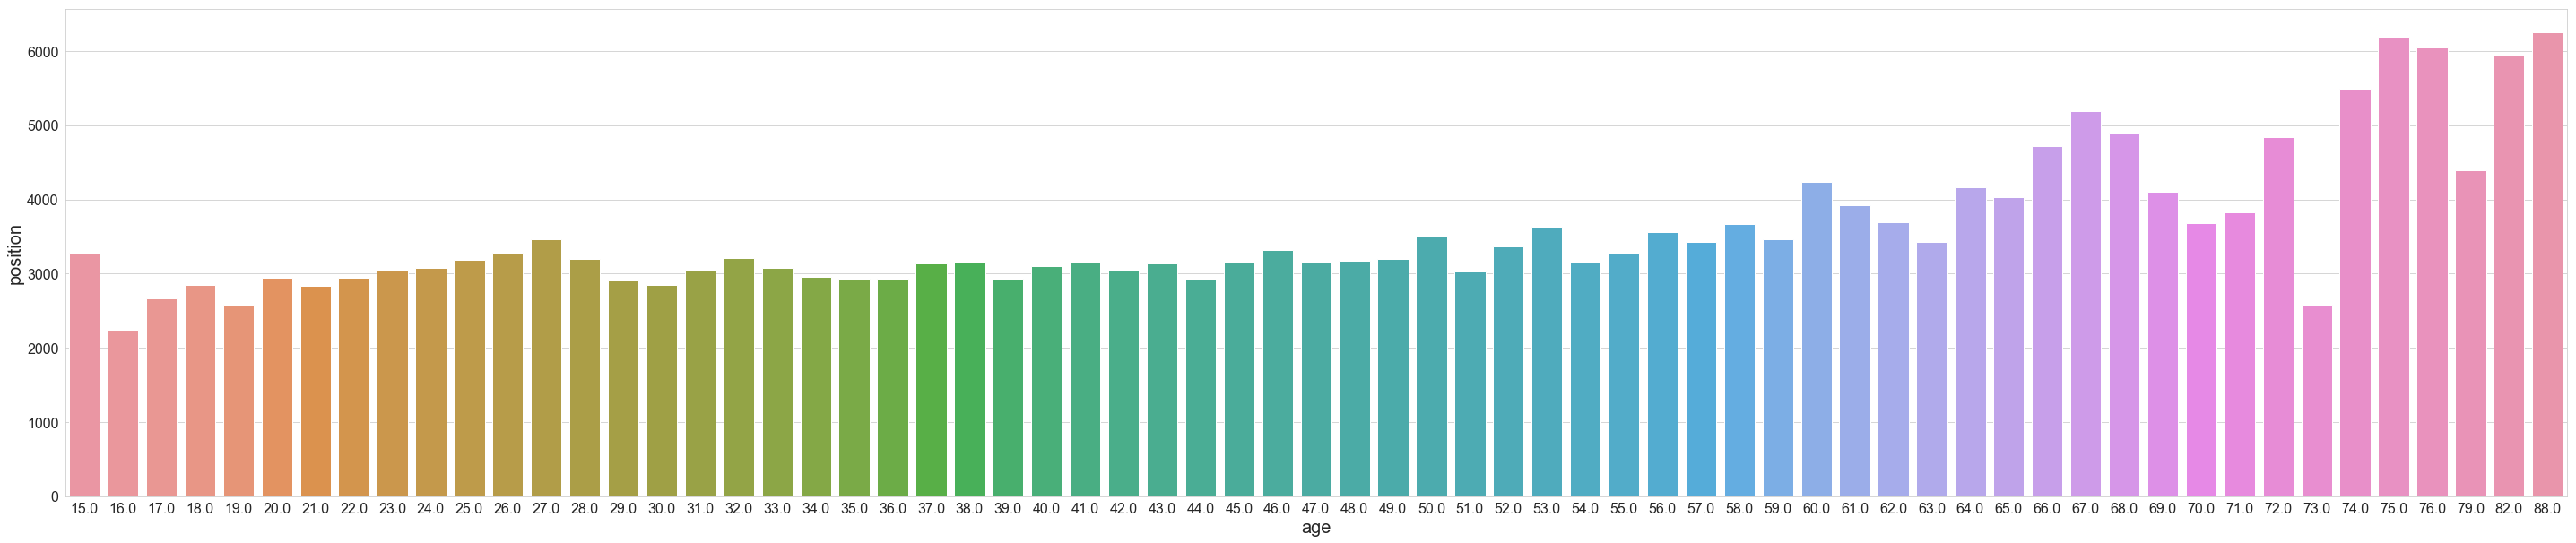

In [85]:
fig, (axis2) = plt.subplots(1,1,figsize=(50,10))
sns.barplot(x='age', y='position',data=average_position,ax =axis2)

In [86]:
# Seems to be 1 fairly fast 73 year old?

In [87]:
df.loc[df['age'] == 73]

,city,name,cat_name,gender,age,time,number,nationality,position,cadence
2587,BRUSSELS,GONZALEZ José,M70,0,73.0,1:53:10,11826,ESP,2588.0,5:22


In [88]:
# before checking what region our cities are in let's convert them to the same case

In [89]:
flanders_cities = [city.upper() for city in flanders_cities]
wallonie_cities = [city.upper() for city in wallonie_cities]
flanders_cities.append('BRUGGE')

In [90]:
# clean up some districts in brussels
brussels_cities = ['BRUSSELS', 'ETTERBEEK','UCCLE', 'ANDERLECHT']

In [91]:
df['region'] = df['city'].apply(lambda x: 0 if x in wallonie_cities else 1 if x in flanders_cities else 2 if x in brussels_cities else 3)

In [92]:
df.sample(12)

,city,name,cat_name,gender,age,time,number,nationality,position,cadence,region
2032,WALEM,THYS Koen,SEH,0,31.0,1:49:16,5484,BEL,2033.0,5:11,3
3135,ANTWERPEN,PUT Jiri,SEH,0,27.0,1:56:59,10113,BEL,3136.0,5:33,3
2062,BAILLEUX,BASTIEN Lionel,M40,0,44.0,1:49:30,4190,BEL,2063.0,5:12,3
4450,SINT - MARTENS - BODEGEM,DE PRYCK Nathan,SEH,0,22.0,2:06:37,6676,BEL,4451.0,6:01,3
2704,BRASSCHAAT,VAN THIELEN Dieter,SEH,0,26.0,1:53:54,7368,BEL,2705.0,5:24,3
1867,ZLOCIENIEC,RUDZINSKI Jozef,M55,0,55.0,1:48:04,5477,POL,1868.0,5:08,3
1707,ELSENE,VAN AKEN Kim,SEH,0,33.0,1:46:51,9558,BEL,1708.0,5:04,3
4022,ROESELARE,VAN DER BEKEN Thibaut,SEH,0,22.0,2:03:17,5723,BEL,4023.0,5:51,1
198,BRUSSELS,PENTTINEN Ilkka,SEH,0,29.0,1:28:57,3353,FIN,199.0,4:13,2
6075,OTTIGNIES,ELLIKER Maïlis,SEF,1,27.0,2:34:38,8695,BEL,6076.0,7:20,3


In [93]:
def saveDF(): 
    df.to_csv("results.csv",encoding='utf-8', index=False)

In [94]:
saveDF() # let's make a quick backup

In [95]:
df.head()

,city,name,cat_name,gender,age,time,number,nationality,position,cadence,region
0,BELPER,BULL Josh,SEH,0,25.0,1:08:07,3164,GBR,1.0,3:14,3
1,ETTERBEEK,CLAIS François,SEH,0,32.0,1:09:00,10080,BEL,2.0,3:17,2
2,GENVAL,BALTY Pierre,SEH,0,22.0,1:11:17,12317,BEL,3.0,3:23,3
3,SOUMAGNE,CAELEN Florent,SEH,0,28.0,1:12:40,3001,BEL,4.0,3:27,3
4,BRUSSELS,OUMAROU Yahaya,SEH,0,30.0,1:13:33,9275,NER,5.0,3:30,2


In [96]:
time = df['time']

In [97]:
import datetime
time[0]

u'1:08:07'

In [98]:
time = time.astype("str")

In [99]:
time[0]

'1:08:07'

In [100]:
def convert_time_to_seconds(time):
    # assumes time is instance of datatime.time
    hours_to_sec = time.hour * 60 * 60
    minutes_to_sec = time.minute * 60
    seconds_raw = time.second
    return hours_to_sec + minutes_to_sec + seconds_raw

In [101]:
def parse_time(time):
    # assumes time is of the format 'h:m:s' 
    # round to int might annoy runners but it's easier for me 
    h,m,s = time.split(":")[0], time.split(":")[1], time.split(":")[2]
    new_time = datetime.time(int(h), int(m), int(s))
    return convert_time_to_seconds(new_time)

In [102]:
df['time'] = df['time'].apply(parse_time)

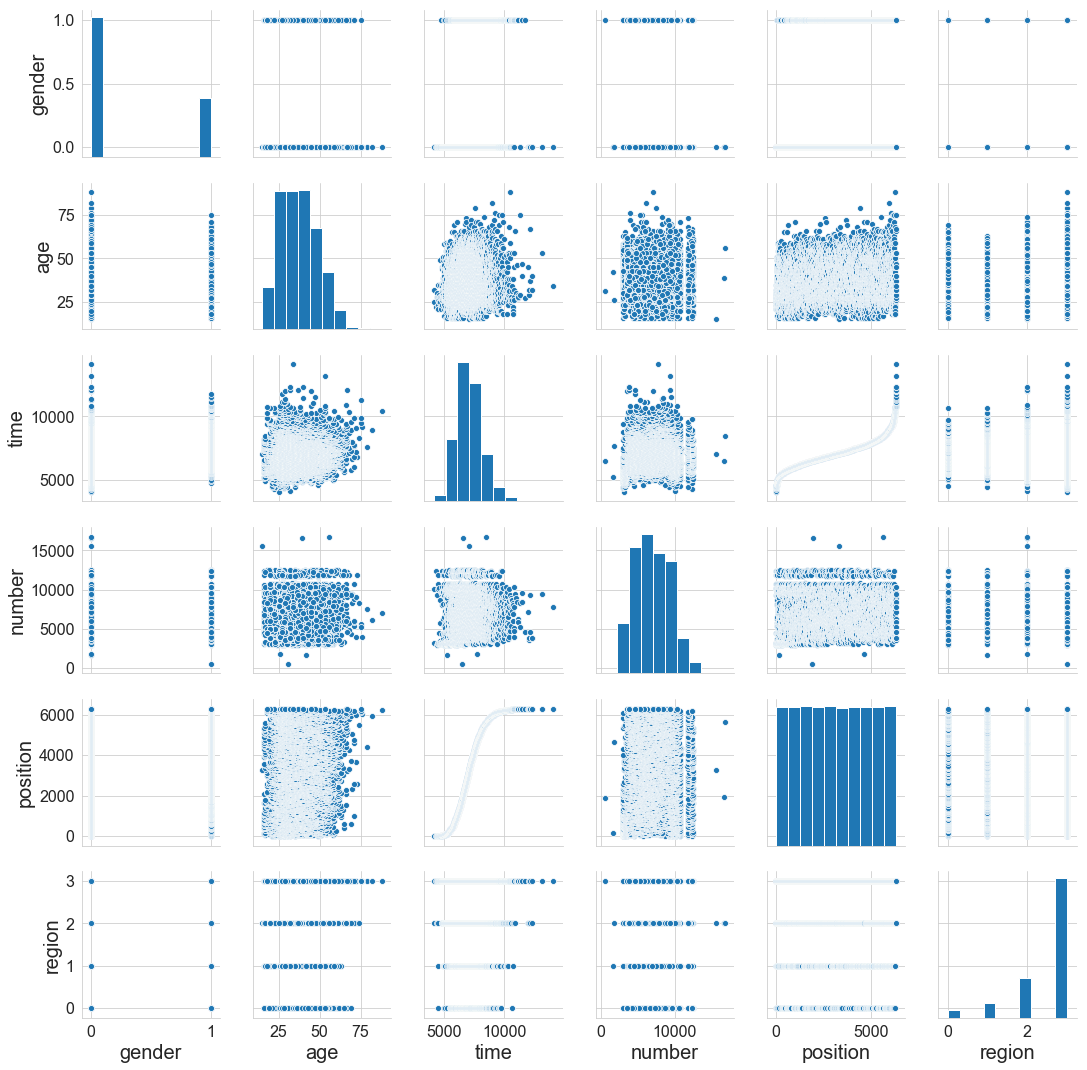

In [103]:
sns.pairplot(df)

In [104]:
df.head()

,city,name,cat_name,gender,age,time,number,nationality,position,cadence,region
0,BELPER,BULL Josh,SEH,0,25.0,4087,3164,GBR,1.0,3:14,3
1,ETTERBEEK,CLAIS François,SEH,0,32.0,4140,10080,BEL,2.0,3:17,2
2,GENVAL,BALTY Pierre,SEH,0,22.0,4277,12317,BEL,3.0,3:23,3
3,SOUMAGNE,CAELEN Florent,SEH,0,28.0,4360,3001,BEL,4.0,3:27,3
4,BRUSSELS,OUMAROU Yahaya,SEH,0,30.0,4413,9275,NER,5.0,3:30,2


In [105]:
# no need to keep floats - let's reduce mem by rounding with int
df['age'] = df['age'].apply(lambda x: int(x))

In [106]:
df['position'] = df['position'].apply(lambda x: int(x))

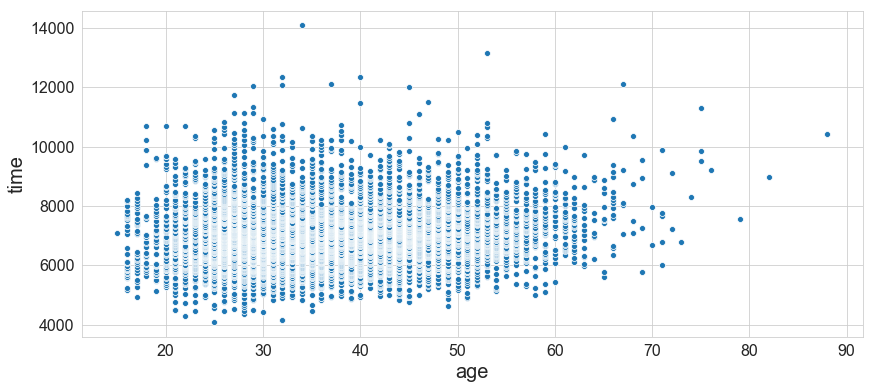

In [107]:
sns.scatterplot(x='age', y='time',data=df)

In [108]:
df.columns

Index([u'city', u'name', u'cat_name', u'gender', u'age', u'time', u'number',
       u'nationality', u'position', u'cadence', u'region'],
      dtype='object')

In [109]:
# let's drop more features
drop_col = ['cat_name', 'cadence', 'region', 'city', 'name','position','number']

In [110]:
df = df.drop(drop_col, axis=1)

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
lb_make = LabelEncoder()
copy_df = df.copy()
copy_df['nat_code'] = lb_make.fit_transform(df['nationality'])
copy_df[['nat_code','nationality']]

,nat_code,nationality
0,37,GBR
1,6,BEL
2,6,BEL
3,6,BEL
4,64,NER
5,33,ETH
6,35,FRA
7,6,BEL
8,6,BEL
9,6,BEL


In [113]:
df['nat_code'] = lb_make.fit_transform(df['nationality'])

In [148]:
df.head()
df = df.drop('nationality',axis=1)

ValueError: labels ['nationality'] not contained in axis

In [149]:
df = df.drop("number", axis=1)

In [150]:
# let's now keep 80% for train and the rest for test
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [151]:
len(test), len(train)

(1291, 4966)

In [152]:
X_train = train.drop("time",axis=1)

In [153]:
Y_train = train['time']

In [154]:
from sklearn.cross_validation import train_test_split

In [155]:
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=101)

In [156]:
X_test = test.copy()

In [157]:
len(x_test)

1490

In [166]:
X_train.head()

,gender,age,nat_code
4305,0,28,6
4566,0,29,88
269,0,27,6
575,0,51,6
902,0,52,6


In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
linreg = LinearRegression()

In [169]:
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
Y_pred1 = linreg.predict(x_test)

In [172]:
print('Coefficients: \n', linreg.coef_)

('Coefficients: \n', array([  8.62573381e+02,   9.05517991e+00,  -3.79792008e-01]))


In [174]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, Y_pred1))

Mean squared error: 986330.59


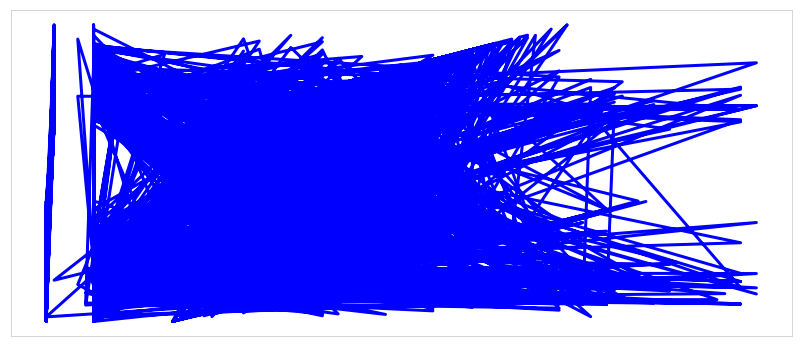

In [180]:
plt.plot(x_test, Y_pred1, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()